Objectives:
- Mean AQI
- Highest AQI
- Lowest AQI
- add articles to add context of why the results are like that
- Some graphs to explain it
- Add engagement questions

###1. Preparation


The code cell below can be thought of as a *declaration*. We are declaring all the Python libraries that we will be using for this project here!

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

The code cell below is relatively unimportant; it allows us to upload any .csv file directly into this Google Colab.

In [ ]:
dataset = files.upload()

Saving global_air_pollution_dataset.csv to global_air_pollution_dataset.csv


The code cell below is also relatively unimportant; it allows us to read in the .csv file and converts it into a pandas dataframe object. Working with dataframes is essential to data science!

In [ ]:
pollute = pd.read_csv("global_air_pollution_dataset.csv")

The code cell below lets us look at the top section of the dataset. This is necessary so that we can get a rough idea about how the dataset is organized. For example, we're able to see the **name of each country**, the **name of the city within the country**, and the **AQI Value**, among other interesting bits of information.

In [ ]:
pollute.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


###2. Cleaning

The code cell below creates an exact copy of the whole dataset. The copy will be edited so that it only contains info on cities in the United States of America.

In [ ]:
usa_df = pollute

The code cell below creates a list of the rows whose Country values are NOT the United States of America

In [ ]:
non_usa = []

for country in pollute.index:
  if pollute["Country"].iloc[country] != "United States of America":
    non_usa.append(country)

The code cell below uses the list created earlier to drop all non-USA countries from the copied dataframe.

In [ ]:
usa_df = usa_df.drop(non_usa).reset_index().drop(["index"], axis=1)

In [ ]:
usa_df['AQI Value'].mean()

59.74059888579387

The code cell below shows us the cleaned version of the dataframe. Hooray!

In [ ]:
usa_df.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
1,United States of America,Phoenix,72,Moderate,1,Good,4,Good,23,Good,72,Moderate
2,United States of America,Pontiac,77,Moderate,2,Good,22,Good,15,Good,77,Moderate
3,United States of America,Port Neches,34,Good,1,Good,19,Good,7,Good,34,Good
4,United States of America,Portales,77,Moderate,1,Good,34,Good,0,Good,77,Moderate
5,United States of America,Post Falls,61,Moderate,1,Good,32,Good,3,Good,61,Moderate
6,United States of America,Dayton,45,Good,1,Good,32,Good,7,Good,45,Good
7,United States of America,Deming,72,Moderate,1,Good,26,Good,2,Good,72,Moderate
8,United States of America,Destin,31,Good,0,Good,31,Good,0,Good,25,Good
9,United States of America,Grandville,47,Good,1,Good,37,Good,4,Good,47,Good


This code cell exports the cleaned dataset so that our peers may be able to use it as well.

In [ ]:
usa_df.to_csv("usa_air_pollution.csv")

###3. Exploratory Visualization

The code cell below exists to return us the minimum and maximum AQI values for the cities in the United States of America.

In [ ]:
usa_min_aqi = usa_df["AQI Value"].min(axis=0)
print(f"Min. AQI in USA: {usa_min_aqi}")

usa_max_aqi = usa_df["AQI Value"].max(axis=0)
print(f"Min. AQI in USA: {usa_max_aqi}")

Min. AQI in USA: 12
Min. AQI in USA: 500


The code cell below implements a histogram using the Seaborn library to display the frequency of each AQI value.

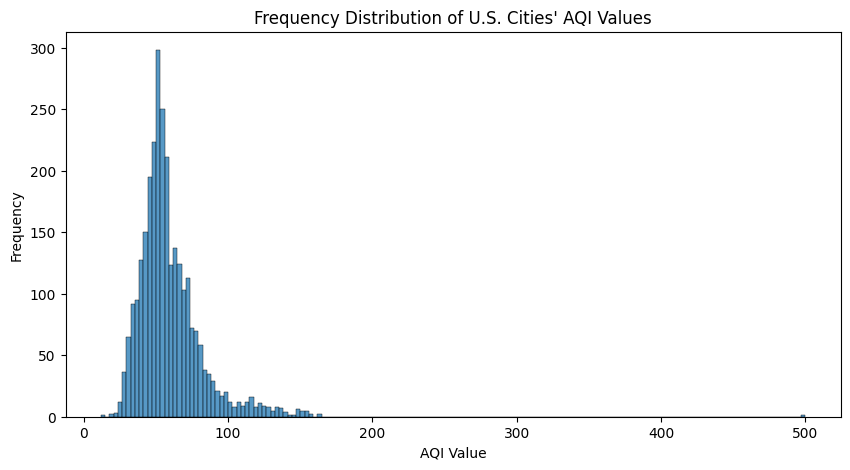

In [ ]:
fig = plt.figure(
    figsize = (10, 5)
)

hist = sns.histplot(
    data = usa_df,
    x = "AQI Value"
)

plt.title("Frequency Distribution of U.S. Cities' AQI Values")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()

###4. What about LA?

The code cell below returns an *index*, the number of a specific row in the data set. In this case, it is the index of the row that contains information about the city of Los Angeles.

In [ ]:
LA_index = usa_df.index.get_loc(usa_df[usa_df["City"] == "Los Angeles"].index[0])
LA_index

158

The code cell below uses the index we found earlier and returns the rest of Los Angeles's pollution information contained in the dataset. We can see the AQI value for Los Angeles as well as some other useful info.

In [ ]:
usa_df.iloc[LA_index]

Country                     United States of America
City                                     Los Angeles
AQI Value                                        116
AQI Category          Unhealthy for Sensitive Groups
CO AQI Value                                       3
CO AQI Category                                 Good
Ozone AQI Value                                   19
Ozone AQI Category                              Good
NO2 AQI Value                                     25
NO2 AQI Category                                Good
PM2.5 AQI Value                                  116
PM2.5 AQI Category    Unhealthy for Sensitive Groups
Name: 158, dtype: object

###5. Visualization with LA

The code cell below prints an updated visualization that displays the AQI of the city of interest, relative to the other cities. In our case, we are interested in the city of Los Angeles, so we are interested in looking at how LA's AQI value compares to the AQI values of other cities.

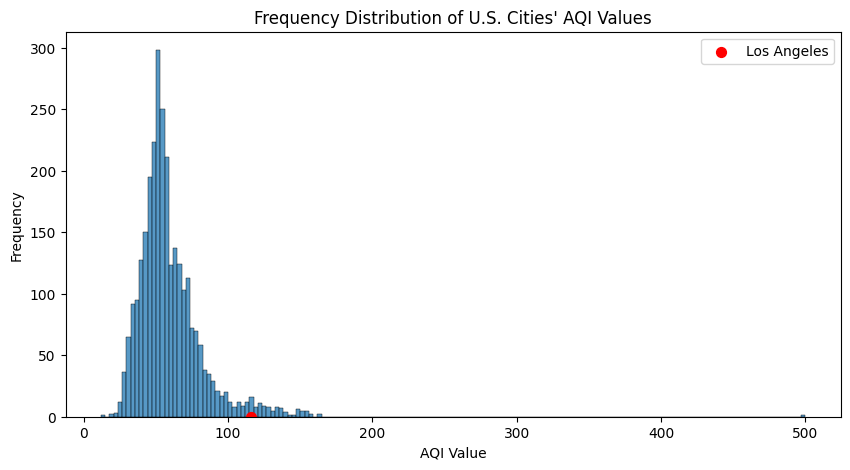

In [ ]:
# AQI declared here for the sake of consistent code
LA_AQI = usa_df.iloc[LA_index, 2]

fig = plt.figure(
    figsize = (10, 5)
)

hist = sns.histplot(
    data = usa_df,
    x = "AQI Value"
)

plt.scatter(
    LA_AQI,
    0,
    s = 50,
    color = "red",
    marker = "o",
    label = "Los Angeles"
)

plt.title("Frequency Distribution of U.S. Cities' AQI Values")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
mean = np.mean(usa_df["AQI Value"])
median = np.median(usa_df["AQI Value"])

print(f"Mean AQI value for USA cities: {mean:.2f}")
print(f"Median AQI value for USA cities: {median}")

Mean AQI value for USA cities: 59.74
Median AQI value for USA cities: 55.0


In [ ]:
# maybe use this code to create a boxplot? idk
from scipy import stats

usa_df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000
mean,59.740599,1.456825,27.619777,8.541435,58.051532
std,22.822531,2.567693,13.160012,8.012248,23.966614
min,12.000000,0.000000,0.000000,0.000000,7.000000
25%,47.000000,1.000000,19.000000,3.000000,45.000000
50%,55.000000,1.000000,27.000000,6.000000,54.000000
75%,68.000000,2.000000,35.000000,12.000000,67.000000
max,500.000000,133.000000,125.000000,53.000000,500.000000


##Test Area (junk code tbh, will delete later)

In [ ]:
mean = np.mean(usa_df["AQI Value"])
print(mean)

median = np.median(usa_df["AQI Value"])
print(median)

59.74059888579387
55.0
